In [1]:
#!pip install scikit-fuzzy matplotlib numpy
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

### se preparan los conjuntos de datos a trabajar y las funciones de pertenencia 

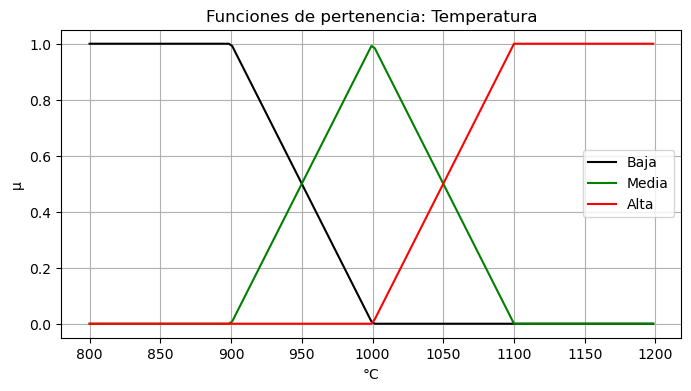

In [2]:
# Universo de la variable TEMPERATURA (°C)
# Es muy importante esta lina, tambien define la cantidad de puntos de discretización (1000) en este caso 50 / 500 = 2.4, variar este valor resultante entre 500 o 2000
temp = np.arange(800, 1200, 2.4)  # 0 a 50 °C

# Conjuntos difusos (funciones de pertenencia)
T_A  = fuzz.trapmf(temp, [800, 800, 900, 1000]) # trapezoidal
T_B  = fuzz.trimf(temp, [900, 1000, 1100])   #
T_C  = fuzz.trapmf(temp, [1000, 1100, 1200,1200])   

# Visualización
plt.figure(figsize=(8, 4))
plt.plot(temp, T_A, color='black', label='Baja')
plt.plot(temp, T_B, color='green', label='Media')
plt.plot(temp, T_C, color='red', label='Alta')
plt.title('Funciones de pertenencia: Temperatura')
plt.xlabel('°C'); plt.ylabel('μ')
plt.ylim(-0.05, 1.05); plt.legend(); plt.grid(True)
plt.show()

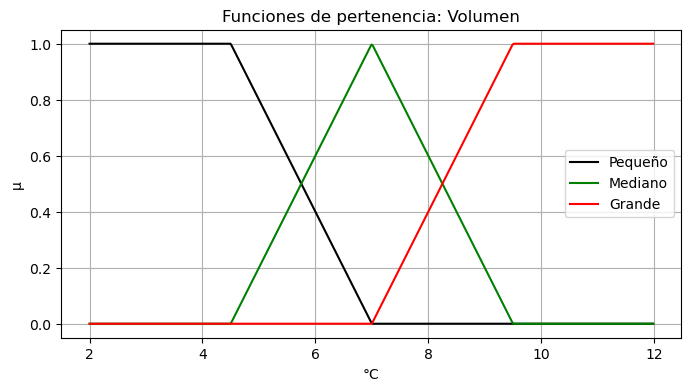

In [3]:
# Universo de la variable TEMPERATURA (°C)
# Es muy importante esta lina, tambien define la cantidad de puntos de discretización (1000) en este caso 12 / 500 = 0.024, variar este valor resultante entre 500 o 2000
vol = np.arange(2, 12, 0.024)  # 0 a 50 °C

# Conjuntos difusos (funciones de pertenencia)
V_A  = fuzz.trapmf(vol, [2, 2, 4.5, 7]) # trapezoidal
V_B  = fuzz.trimf(vol, [4.5, 7, 9.5])   #
V_C  = fuzz.trapmf(vol, [7, 9.5, 12,12])   

# Visualización
plt.figure(figsize=(8, 4))
plt.plot(vol, V_A, color='black', label='Pequeño')
plt.plot(vol, V_B, color='green', label='Mediano')
plt.plot(vol, V_C, color='red', label='Grande')
plt.title('Funciones de pertenencia: Volumen')
plt.xlabel('°C'); plt.ylabel('μ')
plt.ylim(-0.05, 1.05); plt.legend(); plt.grid(True)
plt.show()

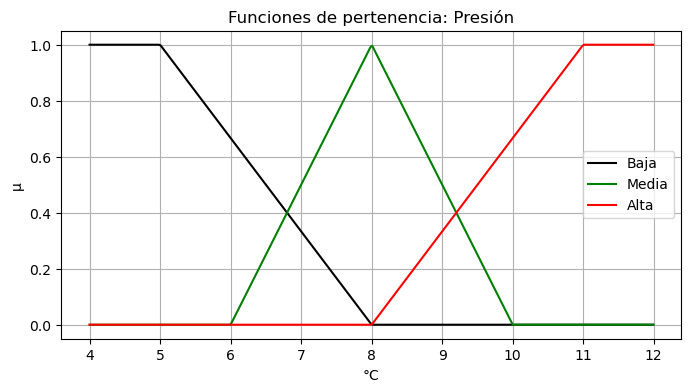

In [4]:
# Universo de la variable TEMPERATURA (°C)
# Es muy importante esta lina, tambien define la cantidad de puntos de discretización (1000) en este caso 12 / 24 = 0.012, variar este valor resultante entre 500 o 2000
pres = np.arange(4, 12, 0.024)  # 0 a 50 °C

# Conjuntos difusos (funciones de pertenencia)
P_A  = fuzz.trapmf(pres, [4, 4, 5, 8]) # trapezoidal
P_B  = fuzz.trimf(pres, [6, 8, 10])   #
P_C  = fuzz.trapmf(pres, [8, 11, 12,12])   

# Visualización
plt.figure(figsize=(8, 4))
plt.plot(pres, P_A, color='black', label='Baja')
plt.plot(pres, P_B, color='green', label='Media')
plt.plot(pres, P_C, color='red', label='Alta')
plt.title('Funciones de pertenencia: Presión')
plt.xlabel('°C'); plt.ylabel('μ')
plt.ylim(-0.05, 1.05); plt.legend(); plt.grid(True)
plt.show()

### punto 1 

In [5]:

# ===== Reglas (término_t, término_h, consecuente_p) =====
rules = [
    (T_A, V_A, P_A),   # si con doble condicion y un entonces 
    (T_B, V_A, P_A),   # si con doble condicion y un entonces 
    (T_C, V_A, P_B),   # si con doble condicion y un entonces 
    (T_A, V_B, P_A),   # si con doble condicion y un entonces 
    (T_B, V_B, P_B),   # si con doble condicion y un entonces 
    (T_C, V_B, P_C),   # si con doble condicion y un entonces 
    (T_A, V_C, P_B),   # si con doble condicion y un entonces 
    (T_B, V_C, P_C),   # si con doble condicion y un entonces 
    (T_C, V_C, P_C)    # si con doble condicion y un entonces 
]



def B_agregado_mamdani(t0, v0):
    acts = []
    for mf_t, mf_h, mf_p in rules:
        wt = fuzz.interp_membership(temp, mf_t, t0)
        wh = fuzz.interp_membership(vol, mf_h, v0)
        w  = min(wt, wh)                 # AND (t-norma: min)
        act = np.fmin(w, mf_p)           # Implicación Mamdani (recorte)
        acts.append(act)
    B = np.maximum.reduce(acts) if acts else np.zeros_like(pres)  # Agregación (OR=max)
    y_star = fuzz.defuzz(pres, B, 'centroid') if B.max() > 0 else np.nan
    return B, y_star




B, y = B_agregado_mamdani(t0=950, v0=5)


In [6]:
B


array([0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5    

In [7]:
y

6.288874353537649

/tmp/ipykernel_167929/2297193730.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(rules))


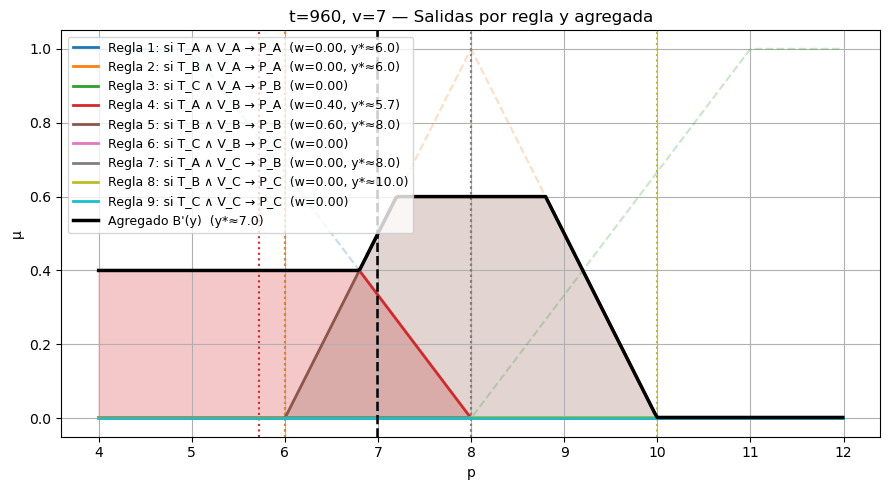

([{'regla': 1, 'w': 0.002133333333332743, 'y*_regla': 5.998006006006019},
  {'regla': 2, 'w': 0.002133333333332743, 'y*_regla': 5.998006006006019},
  {'regla': 3, 'w': 0.0, 'y*_regla': nan},
  {'regla': 4, 'w': 0.4, 'y*_regla': 5.717665882352932},
  {'regla': 5, 'w': 0.6, 'y*_regla': 7.999977142857139},
  {'regla': 6, 'w': 0.0, 'y*_regla': nan},
  {'regla': 7, 'w': 0.0021333333333327428, 'y*_regla': 7.996000000000016},
  {'regla': 8, 'w': 0.0021333333333327428, 'y*_regla': 9.993993993994025},
  {'regla': 9, 'w': 0.0, 'y*_regla': nan}],
 6.992327460016241)

In [8]:
def visualizar_salidas_por_regla(t0, v0, rules, nombres=None):
    acts, ws, y_rules = [], [], []
    # Calcula activación por regla
    for i, (mf_t, mf_h, mf_p) in enumerate(rules):
        wt = fuzz.interp_membership(temp, mf_t, t0)
        wh = fuzz.interp_membership(vol, mf_h, v0)
        w  = min(wt, wh)                       # AND (t-norma: min)
        act = np.fmin(w, mf_p)                 # Implicación Mamdani (recorte)
        acts.append(act); ws.append(w)
        y_i = fuzz.defuzz(pres, act, 'centroid') if act.max()>0 else np.nan
        y_rules.append(y_i)

    # Agregación
    B = np.maximum.reduce(acts) if acts else np.zeros_like(pres)
    y_agg = fuzz.defuzz(pres, B, 'centroid') if B.max()>0 else np.nan

    # --- Plot ---
    plt.figure(figsize=(9,5))
    # Curvas base opcionales (si las tienes accesibles en el scope)
    try:
        plt.plot(pres, P_A, 'C0--', alpha=0.25)
        plt.plot(pres, P_B, 'C1--', alpha=0.25)
        plt.plot(pres, P_C, 'C2--', alpha=0.25)
    except NameError:
        pass

    # Colores para reglas
    cmap = plt.cm.get_cmap('tab10', len(rules))

    for i, act in enumerate(acts):
        label = f"Regla {i+1}"
        if nombres and i < len(nombres):
            label = f"{label}: {nombres[i]}"
        label += f"  (w={ws[i]:.2f}"
        if not np.isnan(y_rules[i]): label += f", y*≈{y_rules[i]:.1f}"
        label += ")"
        plt.fill_between(pres, 0, act, color=cmap(i), alpha=0.25)
        plt.plot(pres, act, color=cmap(i), lw=2, label=label)
        if not np.isnan(y_rules[i]):
            plt.axvline(y_rules[i], color=cmap(i), ls=':', lw=1.5)

    # Agregado
    plt.plot(pres, B, 'k', lw=2.5, label=f"Agregado B'(y)  (y*≈{y_agg:.1f})")
    if not np.isnan(y_agg):
        plt.axvline(y_agg, color='k', ls='--', lw=1.8)

    plt.ylim(-0.05, 1.05); plt.xlabel('p'); plt.ylabel('μ')
    plt.title(f"t={t0}, v={v0} — Salidas por regla y agregada")
    plt.grid(True); plt.legend(loc='upper left', fontsize=9)
    plt.tight_layout(); plt.show()

    # Resumen numérico
    resumen = [
        {"regla": i+1, "w": ws[i], "y*_regla": y_rules[i]}
        for i in range(len(rules))
    ]
    return resumen, y_agg

    (T_A, V_A, P_A),   # si con doble condicion y un entonces 
    (T_B, V_A, P_A),   # si con doble condicion y un entonces 
    (T_C, V_A, P_B),   # si con doble condicion y un entonces 
    (T_A, V_B, P_A),   # si con doble condicion y un entonces 
    (T_B, V_B, P_B),   # si con doble condicion y un entonces 
    (T_C, V_B, P_C),   # si con doble condicion y un entonces 
    (T_A, V_C, P_B),   # si con doble condicion y un entonces 
    (T_B, V_C, P_C),   # si con doble condicion y un entonces 
    (T_C, V_C, P_C)    # si con doble condicion y un entonces 

# Ejemplo de uso (nombres opcionales para las reglas):
nombres = [
    "si T_A ∧ V_A → P_A",
    "si T_B ∧ V_A → P_A",
    "si T_C ∧ V_A → P_B",
    "si T_A ∧ V_B → P_A",
    "si T_B ∧ V_B → P_B",
    "si T_C ∧ V_B → P_C",
    "si T_A ∧ V_C → P_B",
    "si T_B ∧ V_C → P_C",
    "si T_C ∧ V_C → P_C",
]
resumen, y_agregado = visualizar_salidas_por_regla(t0=960, v0=7, rules=rules, nombres=nombres)#alternar el valor t0 puede activar mas reglas 
resumen, y_agregado

/tmp/ipykernel_167929/2297193730.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(rules))


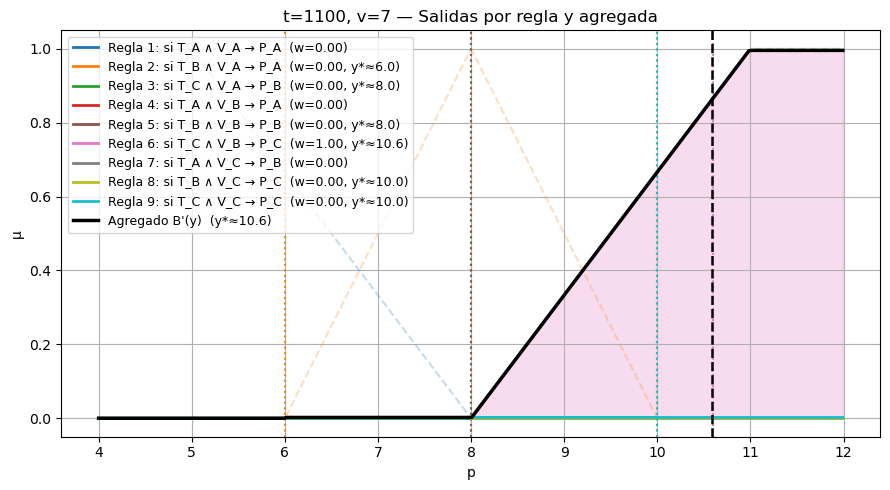

([{'regla': 1, 'w': 0.0, 'y*_regla': nan},
  {'regla': 2, 'w': 2.7284841053156828e-14, 'y*_regla': 5.998006006006019},
  {'regla': 3, 'w': 0.002133333333332743, 'y*_regla': 7.996000000000019},
  {'regla': 4, 'w': 0.0, 'y*_regla': nan},
  {'regla': 5, 'w': 2.7284841053156828e-14, 'y*_regla': 7.996000000000015},
  {'regla': 6, 'w': 0.9957333333333346, 'y*_regla': 10.593957979064138},
  {'regla': 7, 'w': 0.0, 'y*_regla': nan},
  {'regla': 8, 'w': 2.7284841053156828e-14, 'y*_regla': 9.993993993994012},
  {'regla': 9, 'w': 0.0021333333333327428, 'y*_regla': 9.993993993994025}],
 10.587829213483024)

In [9]:
resumen, y_agregado = visualizar_salidas_por_regla(t0=1100, v0=7, rules=rules, nombres=nombres)#alternar el valor t0 puede activar mas reglas 
resumen, y_agregado

### punto 2

/tmp/ipykernel_167929/2297193730.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(rules))


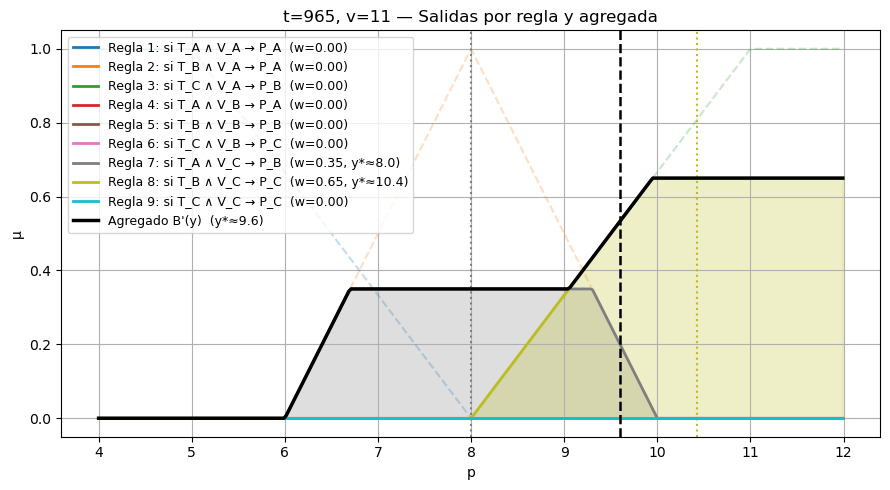

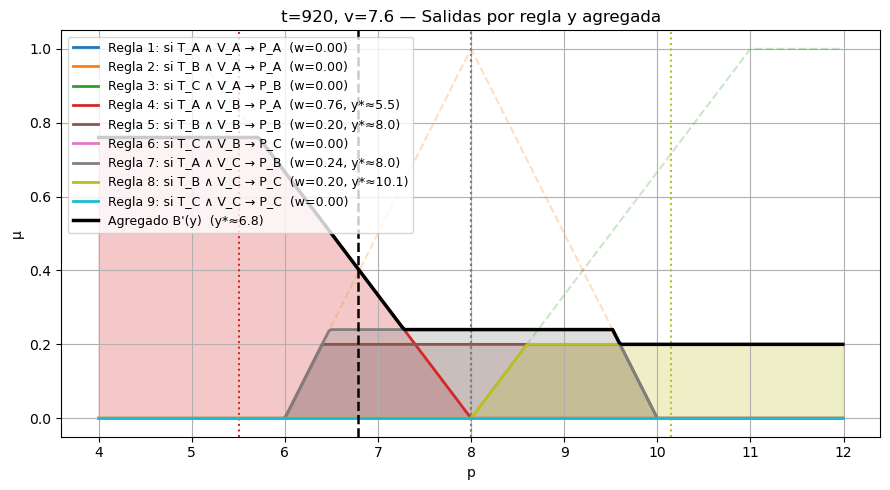

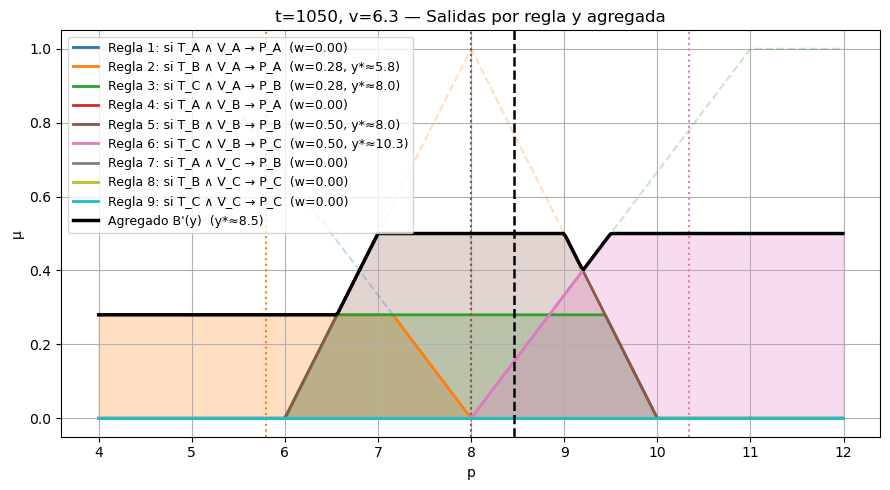

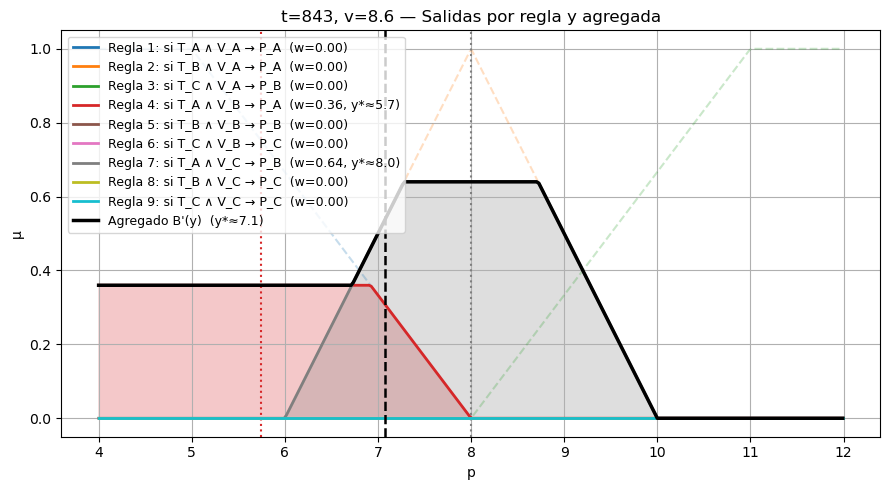

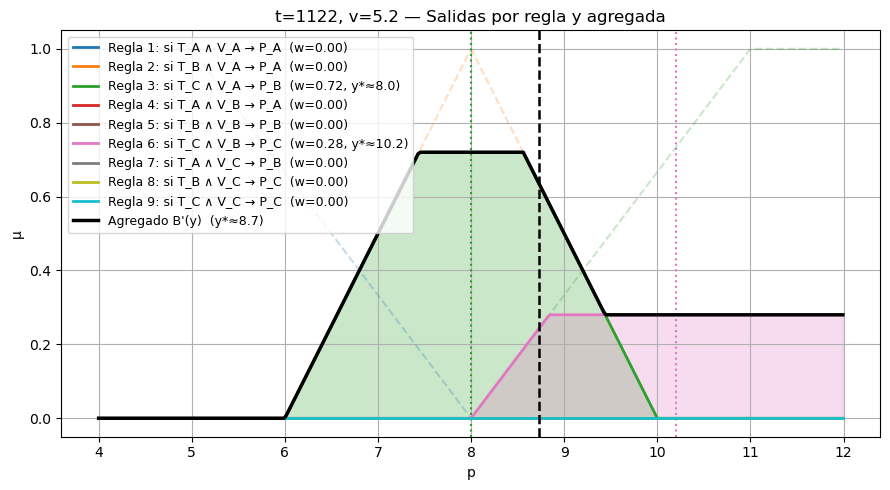

In [10]:
t0_list = [965, 920, 1050, 843, 1122]  #valores de temperatura 
v0_list = [11, 7.6, 6.3, 8.6, 5.2]  #valores de temperatura 


for t0, v0 in zip(t0_list, v0_list):
    resumen, y_agregado = visualizar_salidas_por_regla(t0=t0, v0=v0, rules=rules, nombres=nombres)#alternar el valor t0 puede activar mas reglas 
    resumen, y_agregado

### punto 3

In [11]:
def _mamdani_rule_activation(mf_t, mf_h, mf_p, t0, v0):
    wt = fuzz.interp_membership(temp, mf_t, t0)
    wh = fuzz.interp_membership(vol, mf_h, v0)
    w  = min(wt, wh)                     # AND (t-norma: min) operador minimo 
    act = np.fmin(w, mf_p)               # Implicación (recorte)
    return act, w


In [12]:
def agreg_max(*acts):
    """
    Agregación difusa por MÁXIMO (OR clásico).
    Acepta varios arrays (mismas longitudes) y devuelve el máximo elemento a elemento.
    Uso:
        B = agreg_max(act1, act2, act3, ...)
    """
    # Filtra None y convierte a arreglo
    acts = [np.asarray(a) for a in acts if a is not None]
    if not acts:
        raise ValueError("Proporcione al menos una activación.")
    # np.maximum.reduce hace el OR punto a punto
    return np.maximum.reduce(acts)

# Variante que acepta una lista:
def agreg_max_list(acts_list):
    acts_list = [np.asarray(a) for a in acts_list if a is not None]
    if not acts_list:
        raise ValueError("La lista está vacía.")
    return np.maximum.reduce(acts_list)

In [16]:
def visualizar_salidas_por_regla_multi(fuzz_method, t0_list, v0_list, rules, nombres=None,
                                       mostrar_por_regla_para_indice=None):
    """
    Dibuja B'(y) y su centroide para varios (t0, v0).
    Si mostrar_por_regla_para_indice=k, además sombrea salidas de cada regla para el k-ésimo par.
    """
    assert len(t0_list) == len(v0_list), "t0_list y v0_list deben tener la misma longitud"

    plt.figure(figsize=(10, 6))
    cmap = plt.cm.get_cmap('tab10', len(t0_list))

    # curvas base (opcionales)
    try:
        plt.plot(pres, P_a, 'C0--', alpha=0.15)
        plt.plot(pres, P_b, 'C1--', alpha=0.15)
        plt.plot(pres, P_c, 'C2--', alpha=0.15)
    except NameError:
        pass

    resumen_todos = []
    for i, (t0, v0) in enumerate(zip(t0_list, v0_list)):
        acts, ws, y_rules = [], [], []
        for (mf_t, mf_h, mf_p) in rules:
            act, w = _mamdani_rule_activation(mf_t, mf_h, mf_p, t0, v0)
            acts.append(act); ws.append(w)
            y_i = fuzz.defuzz(pres, act, fuzz_method) if act.max() > 0 else np.nan
            y_rules.append(y_i)

        # Agregación y defuzzificación
        #B = np.maximum.reduce(acts) if acts else np.zeros_like(pres)# con operador maxmin
        B = agreg_max_list(acts) # conoperador de agregacion maximo
        y_agg = fuzz.defuzz(pres, B, 'centroid') if B.max() > 0 else np.nan

        # Plot de la curva agregada para este (t0,v0)
        lbl = f"t={t0}, v={v0} → y*≈{(np.nan if np.isnan(y_agg) else round(y_agg,1))}"
        plt.plot(pres, B, color=cmap(i), lw=2, label=lbl)
        if not np.isnan(y_agg):
            plt.axvline(y_agg, color=cmap(i), ls='--', alpha=0.6)

        # (Opcional) mostrar por-regla para un índice específico
        if mostrar_por_regla_para_indice is not None and i == mostrar_por_regla_para_indice:
            subcmap = plt.cm.get_cmap('Set2', len(rules))
            for rj, act in enumerate(acts):
                name = f"Regla {rj+1}"
                if nombres and rj < len(nombres):
                    name += f": {nombres[rj]}"
                name += f" (w={ws[rj]:.2f}"
                if not np.isnan(y_rules[rj]): name += f", y*≈{y_rules[rj]:.1f}"
                name += ")"
                plt.fill_between(pres, 0, act, color=subcmap(rj), alpha=0.20, label=name)
                if not np.isnan(y_rules[rj]):
                    plt.axvline(y_rules[rj], color=subcmap(rj), ls=':', lw=1.2, alpha=0.9)

        resumen_todos.append({
            "t0": t0, "v0": v0,
            "w_por_regla": ws,
            "y*_por_regla": y_rules,
            "y*_agregado": y_agg
        })

    plt.ylim(-0.05, 1.05)
    plt.xlabel('p'); plt.ylabel('μ')
    plt.title('Salidas agregadas y valores defuzzificados para múltiples (t0, v0)')
    plt.grid(True); plt.legend(loc='upper left', fontsize=9)
    plt.tight_layout(); plt.show()

    return resumen_todos

/tmp/ipykernel_167929/2678504849.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(t0_list))
/tmp/ipykernel_167929/2678504849.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  subcmap = plt.cm.get_cmap('Set2', len(rules))


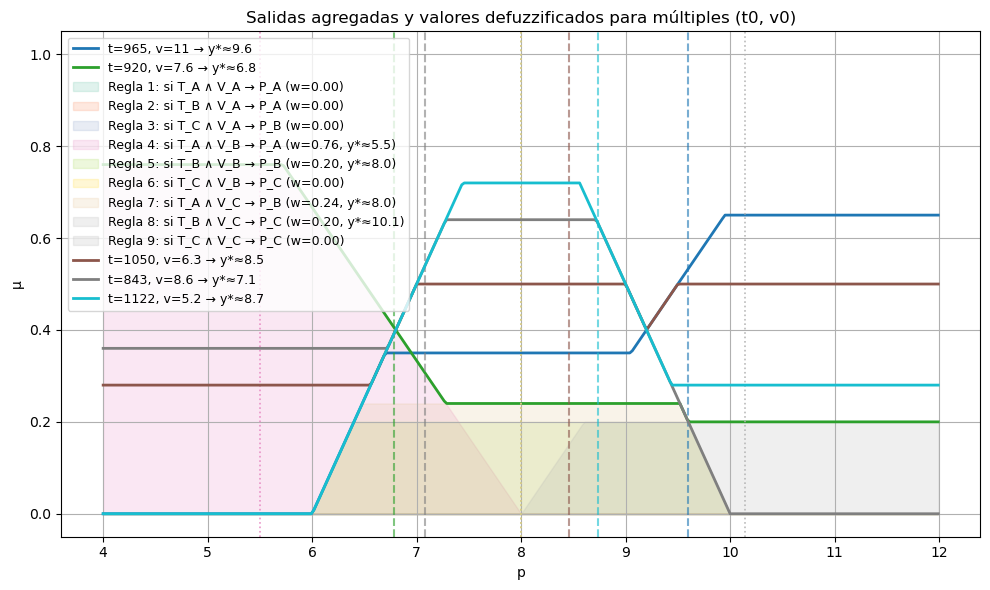

In [17]:

t0_list = [965, 920, 1050, 843, 1122]  
v0_list = [11, 7.6, 6.3, 8.6, 5.2] 
nombres = [
    "si T_A ∧ V_A → P_A",
    "si T_B ∧ V_A → P_A",
    "si T_C ∧ V_A → P_B",
    "si T_A ∧ V_B → P_A",
    "si T_B ∧ V_B → P_B",
    "si T_C ∧ V_B → P_C",
    "si T_A ∧ V_C → P_B",
    "si T_B ∧ V_C → P_C",
    "si T_C ∧ V_C → P_C",
]
fuzz_method = 'centroid'
res = visualizar_salidas_por_regla_multi(fuzz_method, t0_list, v0_list, rules, nombres,
                                         mostrar_por_regla_para_indice=1)

In [18]:
#composicion maxmin
def comp_maxmin(A: np.ndarray, B: np.ndarray) -> np.ndarray:
    """
    Composición difusa máx–mín de A (m×k) y B (k×n).
    Devuelve C (m×n): C[i,j] = max_k min(A[i,k], B[k,j]).
    """
    if A.ndim != 2 or B.ndim != 2 or A.shape[1] != B.shape[0]:
        raise ValueError(f"Dimensiones incompatibles: {A.shape} y {B.shape}")
    return np.max(np.minimum(A[:, :, None], B[None, :, :]), axis=1)

In [19]:
def build_relation_2in(x_univ, h_univ, y_univ, rules_2in):
    """
    Construye R(x,h,y) = max_reglas min( MF_t_i(x), MF_h_k(h), MF_p_j(y) )
    rules_2in: lista de tuplas (mf_t, mf_h, mf_p) (arrays ya evaluados en sus universos).
    Devuelve R de tamaño (|x| × |h| × |y|).
    """
    R_stack = []
    for mf_t, mf_h, mf_p in rules_2in:
        # min triple vía broadcasting: (|x|,1,1) vs (1,|h|,1) vs (1,1,|y|)
        R_rule = np.minimum(
            np.minimum(mf_t[:, None, None], mf_h[None, :, None]),
            mf_p[None, None, :]
        )
        R_stack.append(R_rule)
    return np.maximum.reduce(R_stack) if R_stack else np.zeros((len(x_univ), len(h_univ), len(y_univ)))

In [20]:
def eval_output_from_singleton_2in(R_xhy, x_univ, h_univ, x0, h0):
    ix = np.argmin(np.abs(x_univ - x0))
    ih = np.argmin(np.abs(h_univ - h0))
    return R_xhy[ix, ih, :]  # B'(y) difuso

In [21]:
# Universos: x_univ (t), h_univ (h), y_univ (p)

rules_2in = [
    (T_A, V_A, P_A),   # si con doble condicion y un entonces 
    (T_B, V_A, P_A),   # si con doble condicion y un entonces 
    (T_C, V_A, P_B),   # si con doble condicion y un entonces 
    (T_A, V_B, P_A),   # si con doble condicion y un entonces 
    (T_B, V_B, P_B),   # si con doble condicion y un entonces 
    (T_C, V_B, P_C),   # si con doble condicion y un entonces 
    (T_A, V_C, P_B),   # si con doble condicion y un entonces 
    (T_B, V_C, P_C),   # si con doble condicion y un entonces 
    (T_C, V_C, P_C)    # si con doble condicion y un entonces 
]


R_thy = build_relation_2in(temp, vol, pres, rules_2in)  # |x|×|h|×|y|

# Entrada crisp (x0,h0) y salida difusa B'(y)
t0, v0 = 1050, 6.3
B_prime = eval_output_from_singleton_2in(R_thy, temp, vol, t0, v0)  # vector |y|

y_star = fuzz.defuzz(pres, B_prime, 'centroid') if B_prime.max()>0 else np.nan

In [22]:
B_prime

array([0.2816    , 0.2816    , 0.2816    , 0.2816    , 0.2816    ,
       0.2816    , 0.2816    , 0.2816    , 0.2816    , 0.2816    ,
       0.2816    , 0.2816    , 0.2816    , 0.2816    , 0.2816    ,
       0.2816    , 0.2816    , 0.2816    , 0.2816    , 0.2816    ,
       0.2816    , 0.2816    , 0.2816    , 0.2816    , 0.2816    ,
       0.2816    , 0.2816    , 0.2816    , 0.2816    , 0.2816    ,
       0.2816    , 0.2816    , 0.2816    , 0.2816    , 0.2816    ,
       0.2816    , 0.2816    , 0.2816    , 0.2816    , 0.2816    ,
       0.2816    , 0.2816    , 0.2816    , 0.2816    , 0.2816    ,
       0.2816    , 0.2816    , 0.2816    , 0.2816    , 0.2816    ,
       0.2816    , 0.2816    , 0.2816    , 0.2816    , 0.2816    ,
       0.2816    , 0.2816    , 0.2816    , 0.2816    , 0.2816    ,
       0.2816    , 0.2816    , 0.2816    , 0.2816    , 0.2816    ,
       0.2816    , 0.2816    , 0.2816    , 0.2816    , 0.2816    ,
       0.2816    , 0.2816    , 0.2816    , 0.2816    , 0.2816 

In [23]:
y_star

8.448955185688632

In [24]:
# operador de agregación el Maximo.

/tmp/ipykernel_167929/2678504849.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(t0_list))
/tmp/ipykernel_167929/2678504849.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  subcmap = plt.cm.get_cmap('Set2', len(rules))


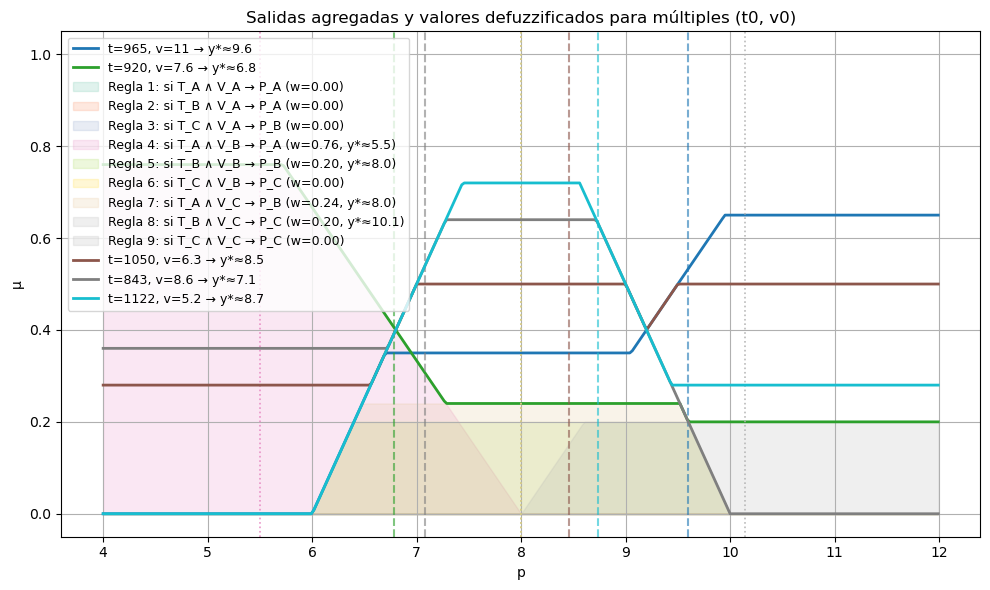

In [27]:
#punto 4
fuzz_method = 'centroid'
res = visualizar_salidas_por_regla_multi(fuzz_method, t0_list, v0_list, rules, nombres,
                                         mostrar_por_regla_para_indice=1)

/tmp/ipykernel_167929/2678504849.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(t0_list))
/tmp/ipykernel_167929/2678504849.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  subcmap = plt.cm.get_cmap('Set2', len(rules))


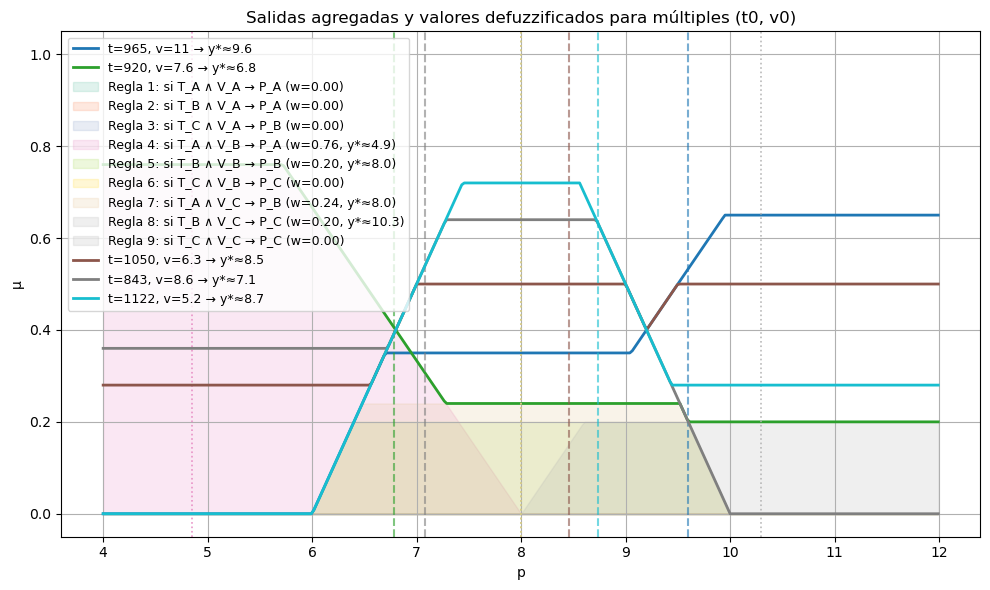

In [30]:
#punto 5 
fuzz_method = 'mom'# MOM (Mean of Maxima) Promedio de todos los puntos donde 𝜇(𝑦) μ(y) alcanza su valor máximo.
res = visualizar_salidas_por_regla_multi(fuzz_method, t0_list, v0_list, rules, nombres,
                                         mostrar_por_regla_para_indice=1)

/tmp/ipykernel_167929/2678504849.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(t0_list))
/tmp/ipykernel_167929/2678504849.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  subcmap = plt.cm.get_cmap('Set2', len(rules))


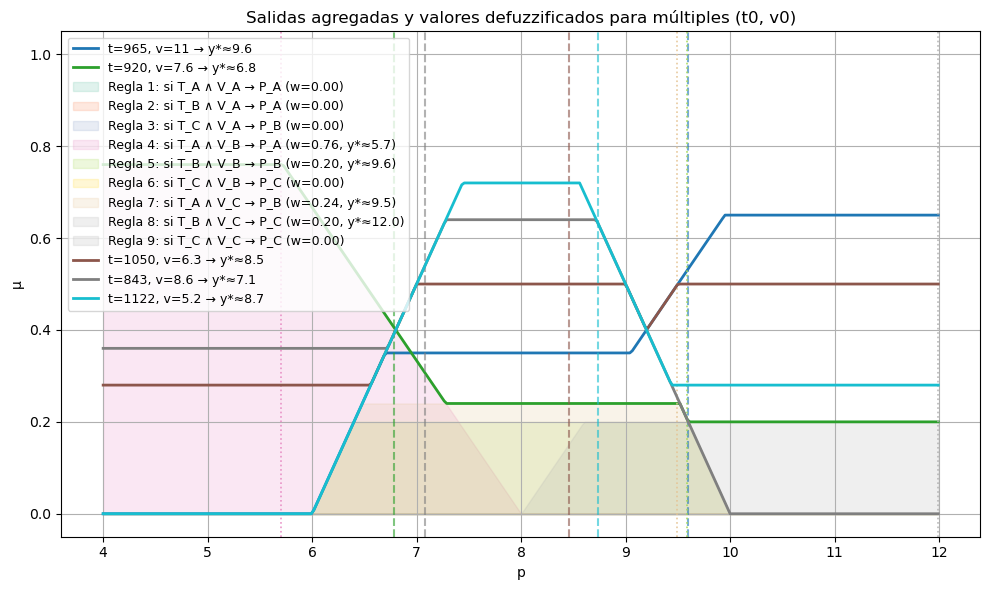

In [31]:
#punto 6
fuzz_method = 'lom'# LOM (Largest of Maxima) El mayor  𝑦 y entre los máximos. Conservador hacia la derecha.
res = visualizar_salidas_por_regla_multi(fuzz_method, t0_list, v0_list, rules, nombres,
                                         mostrar_por_regla_para_indice=1)

### punto 4 

### punto 5